# Load NWB file content

In [2]:
# general python modules for scientific analysis
import os
import numpy as np
import matplotlib.pylab as plt
#plt.style.use('seaborn')

# load the NWB python API
import pynwb

# Data are stored as (nFeatures, nTimesamps) instead of (nTimesamps, nFeatures)
# this generates a warning for each modality, so we disable them
import warnings
warnings.filterwarnings("ignore")

root_datafolder = os.path.join(os.path.expanduser('~'), 'Downloads', 'nwb-data-sharing-pipeline-NDNF-Wild-Type-2022')

### Example file:

Get the datafile from the bucket in the repository https://wiki.ebrains.eu/bin/view/Collabs/nwb-data-sharing-pipeline/Bucket

In [5]:
filename = os.path.join(root_datafolder, '2022_12_14-13-27-41.nwb')
io = pynwb.NWBHDF5IO(filename, 'r')
nwbfile = io.read()

## File content: metadata, raw signals and preprocessed quantities

In the printed version below, one see a (messy) overview of the file content

In [6]:
print(nwbfile)

root pynwb.file.NWBFile at 0x11348144592
Fields:
  acquisition: {
    CaImaging-TimeSeries <class 'pynwb.ophys.TwoPhotonSeries'>,
    Photodiode-Signal <class 'pynwb.base.TimeSeries'>,
    Running-Speed <class 'pynwb.base.TimeSeries'>
  }
  devices: {
    Imaging device with settings: 
 {'activeMode': 'ResonantGalvo', 'bitDepth': '13', 'currentScanAmplitude': {'XAxis': '-3.47', 'YAxis': '8.65'}, 'currentScanCenter': {'XAxis': '0.045', 'YAxis': '0.047'}, 'dwellTime': '0.4', 'framePeriod': '0.033987239', 'interlacedScanChannelMapping': {'0': '0', '1': '1'}, 'interlacedScanTrackCount': '2', 'interlacedScanTrackLasers': {'0': '0', '1': '1', '2': '', '3': ''}, 'interlacedScanTrackMapping': {'0': '1', '1': '0', '2': '-1', '3': '-1'}, 'interlacedScanTrackPowers': {'0': '-1', '1': '-1', '2': '', '3': ''}, 'laserPower': {'Tunable': '346.153846153846'}, 'laserWavelength': {'Laser': '950'}, 'linesPerFrame': '512', 'maxVoltage': {'XAxis': '-7.755', 'YAxis': '8.697'}, 'micronsPerPixel': {'XAxis': '

## Session Description

I used the session description to store all metadata:
- subject info that could not be put in the NWB defaults
- some infos on my recording setup configuration (acq settings, calibration values, trigger details, ...)
- the visual stimulation parameters

In [7]:
print(nwbfile.session_description)

{'config': 'Yann-Ophys-A1', 'root-data-folder': 'C:\\Users\\yann.zerlaut\\DATA', 'Screen': 'Dell-2020', 'protocol': 'NDNF-protocol', 'VisualStim': True, 'intervention': '', 'notes': '', 'subject_ID': 'Mouse_E1-NDNF', 'subject_props': {'Subject-ID': 'Mouse_E1-NDNF', 'Anibio-Number': 'nan', 'Date-of-Birth': '29/11/2022', 'Tatoo': 'nan', 'Sex': 'F', 'Strain': 'nan', 'Genotype': 'nan', 'Surgery': 'nan', 'Surgery-Date': 'nan', 'Virus': 'nan', 'headplate-angle-from-rig-axis': '10.0', 'FOV1': '(0,0)', 'FOV2': 'nan', 'FOV3': 'nan', 'FOV4': 'nan', 'FOV5': 'nan'}, 'NIdaq-acquisition-frequency': 10000, 'NIdaq-analog-input-channels': 1, 'NIdaq-digital-input-channels': 2, 'Rig': 'ICM-A1-2P-setup', 'Z-sign-correction-for-rig': -1, 'FaceCamera-frame-rate': 30, 'FaceCamera-1cm-in-pix': 480, 'STEP_FOR_CA_IMAGING_TRIGGER': {'channel': 0, 'onset': 0.1, 'duration': 0.3, 'value': 5.0}, 'STEPS_FOR_PHOTOSTIM': [{'channel': 1, 'onset': 120, 'duration': 0.5, 'value': 5.0}, {'channel': 1, 'onset': 720, 'duratio

In [8]:
# nasty way to get back to a python dictionary:
exec('metadata='+str(nwbfile.session_description))

In [9]:
# now we can use this to get back some infos
for key in ['NIdaq-acquisition-frequency', 'Screen', 'Protocol-2']:
    print('  %s --> %s ' % (key, metadata[key]))

  NIdaq-acquisition-frequency --> 10000 
  Screen --> Dell-2020 
  Protocol-2 --> subprotocols/NDNF/random-dots.json 


## Subject information

In [10]:
# just the "subject" information
nwbfile.subject

subject pynwb.file.Subject at 0x11348141840
Fields:
  date_of_birth: 2022-11-29 00:00:00+01:00
  description: Unknown
  genotype: Unknown
  sex: Unknown
  species: Unknown
  subject_id: Unknown
  weight: Unknown

In [11]:
# + those that I have
metadata['subject_props']

{'Subject-ID': 'Mouse_E1-NDNF',
 'Anibio-Number': 'nan',
 'Date-of-Birth': '29/11/2022',
 'Tatoo': 'nan',
 'Sex': 'F',
 'Strain': 'nan',
 'Genotype': 'nan',
 'Surgery': 'nan',
 'Surgery-Date': 'nan',
 'Virus': 'nan',
 'headplate-angle-from-rig-axis': '10.0',
 'FOV1': '(0,0)',
 'FOV2': 'nan',
 'FOV3': 'nan',
 'FOV4': 'nan',
 'FOV5': 'nan'}

## Some general information stored in regular entries of NWB files

In [12]:
nwbfile.experimenter

('Yann Zerlaut',)

In [13]:
nwbfile.experiment_description

'NDNF-protocol'

In [14]:
nwbfile.file_create_date

[datetime.datetime(2023, 1, 10, 18, 8, 9, 619354, tzinfo=tzoffset(None, 3600))]

In [15]:
nwbfile.institution

'Institut du Cerveau et de la Moelle, Paris'

In [16]:
nwbfile.lab

'Rebola and Bacci labs'

## Acquisition data

In [17]:
nwbfile.acquisition

{'CaImaging-TimeSeries': CaImaging-TimeSeries pynwb.ophys.TwoPhotonSeries at 0x11348162000
 Fields:
   comments: raw-data-folder=**home**yann.zerlaut**ASSEMBLE**TSeries-12142022-001
   conversion: 1.0
   data: <HDF5 dataset "data": shape (2, 2, 2), type "<f8">
   description: no description
   dimension: <HDF5 dataset "dimension": shape (1,), type "<i8">
   imaging_plane: my_imgpln pynwb.ophys.ImagingPlane at 0x11355022032
 Fields:
   conversion: 1.0
   description: Depth=-97.5[um]
   device: Imaging device with settings: 
  {'activeMode': 'ResonantGalvo', 'bitDepth': '13', 'currentScanAmplitude': {'XAxis': '-3.47', 'YAxis': '8.65'}, 'currentScanCenter': {'XAxis': '0.045', 'YAxis': '0.047'}, 'dwellTime': '0.4', 'framePeriod': '0.033987239', 'interlacedScanChannelMapping': {'0': '0', '1': '1'}, 'interlacedScanTrackCount': '2', 'interlacedScanTrackLasers': {'0': '0', '1': '1', '2': '', '3': ''}, 'interlacedScanTrackMapping': {'0': '1', '1': '0', '2': '-1', '3': '-1'}, 'interlacedScanTrac

Text(0.5, 0, 'sample # (acq. @ 50.0Hz)')

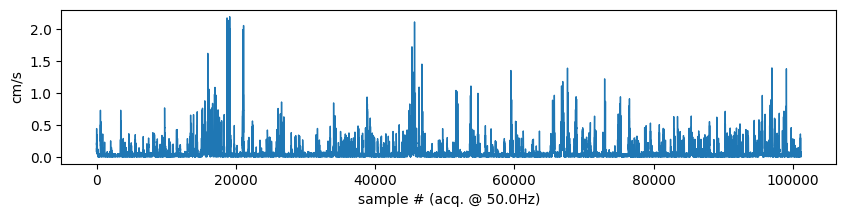

In [18]:
# raw facecamera data
fig, AX = plt.subplots(1, figsize=(10,2))
plt.plot(nwbfile.acquisition['Running-Speed'].data[:], lw=1)
plt.ylabel('cm/s')
plt.xlabel('sample # (acq. @ %.1fHz)' % nwbfile.acquisition['Running-Speed'].rate)

## Processed data

In [21]:
nwbfile.processing

{'FaceMotion': FaceMotion pynwb.base.ProcessingModule at 0x11353916176
 Fields:
   data_interfaces: {
     face-motion <class 'pynwb.base.TimeSeries'>,
     grooming <class 'pynwb.base.TimeSeries'>
   }
   description: face motion dynamics,
  facemotion ROI: (x0,dx,y0,dy)=(200,678,430,321)
 ,
 'Pupil': Pupil pynwb.base.ProcessingModule at 0x11355519568
 Fields:
   data_interfaces: {
     angle <class 'pynwb.base.TimeSeries'>,
     blinking <class 'pynwb.base.TimeSeries'>,
     cx <class 'pynwb.base.TimeSeries'>,
     cy <class 'pynwb.base.TimeSeries'>,
     sx <class 'pynwb.base.TimeSeries'>,
     sy <class 'pynwb.base.TimeSeries'>
   }
   description: processed quantities of Pupil dynamics,
  pupil ROI: (xmin,xmax,ymin,ymax)=(92,246,538,627)
  pix_to_mm=0.021,
 'ophys': ophys pynwb.base.ProcessingModule at 0x11348156816
 Fields:
   data_interfaces: {
     Backgrounds_0 <class 'pynwb.base.Images'>,
     Fluorescence <class 'pynwb.ophys.Fluorescence'>,
     ImageSegmentation <class 'pyn

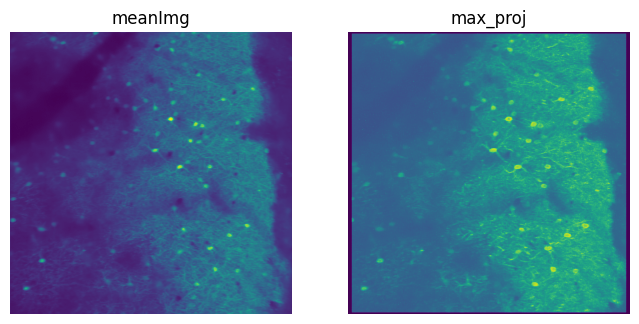

In [22]:
# Calcium Imaging
fig, AX = plt.subplots(1, 2, figsize=(8,5))
for key, ax in zip(['meanImg', 'max_proj'], AX):
    ax.imshow(np.array(nwbfile.processing['ophys'].data_interfaces['Backgrounds_0'][key])**.2, 
              cmap=plt.cm.viridis)
    ax.set_title(key)
    ax.axis('off')

In [23]:
nwbfile.processing['ophys'].data_interfaces['Fluorescence'].roi_response_series['Fluorescence'].timestamps[:]

array([1.69936195e-02, 5.09808615e-02, 8.49681035e-02, ...,
       2.02426314e+03, 2.02429713e+03, 2.02433111e+03])

Text(0.5, 0, 'time (s)')

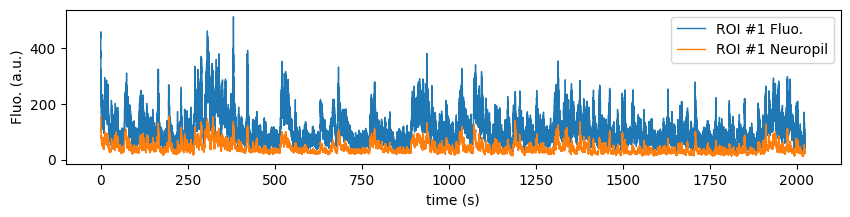

In [36]:
# calcium traces
roi = 0
fig, AX = plt.subplots(1, figsize=(10,2))
plt.plot(nwbfile.processing['ophys'].data_interfaces['Fluorescence'].roi_response_series['Fluorescence'].timestamps[:],
         nwbfile.processing['ophys'].data_interfaces['Fluorescence'].roi_response_series['Fluorescence'].data[:,roi], 
         lw=1, label='ROI #%i Fluo.' % (roi+1))
plt.plot(nwbfile.processing['ophys'].data_interfaces['Neuropil'].roi_response_series['Neuropil'].timestamps[:],
         nwbfile.processing['ophys'].data_interfaces['Neuropil'].roi_response_series['Neuropil'].data[:,roi],
         lw=1, label='ROI #%i Neuropil' % (roi+1))
plt.legend()
plt.ylabel('Fluo. (a.u.)')
plt.xlabel('time (s)')

In [31]:
nwbfile.processing['ophys'].data_interfaces

{'Backgrounds_0': Backgrounds_0 pynwb.base.Images at 0x11355554640
 Fields:
   description: no description
   images: {
     Vcorr <class 'pynwb.image.GrayscaleImage'>,
     max_proj <class 'pynwb.image.GrayscaleImage'>,
     meanImg <class 'pynwb.image.GrayscaleImage'>,
     meanImgE <class 'pynwb.image.GrayscaleImage'>
   },
 'Fluorescence': Fluorescence pynwb.ophys.Fluorescence at 0x11355653840
 Fields:
   roi_response_series: {
     Fluorescence <class 'pynwb.ophys.RoiResponseSeries'>
   },
 'ImageSegmentation': ImageSegmentation pynwb.ophys.ImageSegmentation at 0x11355740112
 Fields:
   plane_segmentations: {
     PlaneSegmentation <class 'pynwb.ophys.PlaneSegmentation'>
   },
 'Neuropil': Neuropil pynwb.ophys.Fluorescence at 0x11355569872
 Fields:
   roi_response_series: {
     Neuropil <class 'pynwb.ophys.RoiResponseSeries'>
   }}